In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [2]:
sc.master

'local[*]'

In [3]:
from pyspark.sql.types import *
import matplotlib.pyplot as plt
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.types import StructType, StructField, StringType, IntegerType
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col
from pyspark.sql.functions import when
from pyspark.ml.classification import RandomForestClassifier
from pyspark.sql.types import StructType, StructField, StringType, FloatType
from pyspark.sql.functions import col, format_number
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline
import pyspark
import time
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

In [4]:
total_execution_time = 0  # Initialize total execution time

# Function to execute PySpark tasks and print execution time
def print_execution_time(start_time):
    global total_execution_time
    # Calculate and print execution time
    end_time = time.time()
    execution_time = end_time - start_time
    total_execution_time += execution_time
    print("Execution time:", execution_time, "seconds")

In [5]:
# Start time
start_time = time.time()

# Read CSV files from HDFS
df = spark.read.csv("hdfs://localhost:9000/user1/*.csv", header=True, inferSchema=True)

print_execution_time(start_time)


Execution time: 58.77563285827637 seconds


In [6]:
# Start time
start_time = time.time()

# Extract the list of imported CSV files
imported_files = df.inputFiles()

# Sort the list of imported CSV files
sorted_files = sorted(imported_files)

# Print the sorted list of imported CSV files
print("Sorted list of imported CSV files:")
for file_path in sorted_files:
    print(file_path)

print_execution_time(start_time)

Sorted list of imported CSV files:
hdfs://localhost:9000/user1/part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
hdfs://localhost:9000/user1/part-00001-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
hdfs://localhost:9000/user1/part-00002-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
hdfs://localhost:9000/user1/part-00003-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
hdfs://localhost:9000/user1/part-00004-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
hdfs://localhost:9000/user1/part-00005-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
hdfs://localhost:9000/user1/part-00006-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
hdfs://localhost:9000/user1/part-00007-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
hdfs://localhost:9000/user1/part-00008-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
hdfs://localhost:9000/user1/part-00009-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
hdfs://localhost:9000/user1/part-00010-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
hdfs://localhost:9000/user1/pa

In [7]:
# Start time
start_time = time.time()


# Print list of all columns
print(df.columns)
print()
print("Total number of columns:", len(df.columns))

print_execution_time(start_time)


['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label']

Total number of columns: 47
Execution time: 0.09647727012634277 seconds


In [8]:
# Start time
start_time = time.time()

# Count the number of rows in the DataFrame
print(df.count())

print_execution_time(start_time)

3802000
Execution time: 6.4254772663116455 seconds


In [9]:
# Start time
start_time = time.time()


# Select columns to display
columns_to_display = df.columns[:4] + df.columns[-4:]  # Select first 10 and last 10 columns

# Show the selected columns with a limited number of rows
df.select(columns_to_display).show(truncate=True) # truncate long strings

print_execution_time(start_time)

+------------------+-------------+-------------+--------+------------------+--------+------+------------------+
|     flow_duration|Header_Length|Protocol Type|Duration|        Covariance|Variance|Weight|             label|
+------------------+-------------+-------------+--------+------------------+--------+------+------------------+
|               0.0|          0.0|        46.53|   63.36|            282.24|    0.02|141.55|Mirai-greeth_flood|
|               0.0|          0.0|          1.0|    64.0|               0.0|     0.0|141.55|   DDoS-ICMP_Flood|
|0.0842197370529174|      17239.0|         17.0|    64.0|               0.0|     0.0|141.55|    DDoS-UDP_Flood|
| 4.499600594043732|        108.0|          6.0|    64.0|               0.0|     0.0|141.55|     DoS-SYN_Flood|
|0.0184206819534301|      14575.0|         17.0|    64.0|               0.0|     0.0|141.55|     DoS-UDP_Flood|
|               0.0|         54.0|          6.0|    64.0|               0.0|     0.0|141.55|  DDoS-RSTFI

In [10]:
# Start time
start_time = time.time()

# Data Summary
print("Data Summary:")
df.printSchema()

print_execution_time(start_time)

Data Summary:
root
 |-- flow_duration: double (nullable = true)
 |-- Header_Length: double (nullable = true)
 |-- Protocol Type: double (nullable = true)
 |-- Duration: double (nullable = true)
 |-- Rate: double (nullable = true)
 |-- Srate: double (nullable = true)
 |-- Drate: double (nullable = true)
 |-- fin_flag_number: double (nullable = true)
 |-- syn_flag_number: double (nullable = true)
 |-- rst_flag_number: double (nullable = true)
 |-- psh_flag_number: double (nullable = true)
 |-- ack_flag_number: double (nullable = true)
 |-- ece_flag_number: double (nullable = true)
 |-- cwr_flag_number: double (nullable = true)
 |-- ack_count: double (nullable = true)
 |-- syn_count: double (nullable = true)
 |-- fin_count: double (nullable = true)
 |-- urg_count: double (nullable = true)
 |-- rst_count: double (nullable = true)
 |-- HTTP: double (nullable = true)
 |-- HTTPS: double (nullable = true)
 |-- DNS: double (nullable = true)
 |-- Telnet: double (nullable = true)
 |-- SMTP: doubl

In [11]:
# Start time
start_time = time.time()

# Data Distribution
print("Data Distribution:")
num_cols_per_table = 5
numeric_columns = [col_name for col_name, data_type in df.dtypes if data_type != "string"]
categorical_columns = [col_name for col_name, data_type in df.dtypes if data_type == "string"]

# Process numeric columns
for i in range(0, len(numeric_columns), num_cols_per_table):
    table_columns = numeric_columns[i:i+num_cols_per_table]
    df.select(table_columns).summary().show()

# Process categorical columns
for i in range(0, len(categorical_columns), num_cols_per_table):
    table_columns = categorical_columns[i:i+num_cols_per_table]
    for col_name in table_columns:
        print(col_name + ":")
        df.groupBy(col_name).count().show()
        
print_execution_time(start_time)

Data Distribution:


24/04/01 18:10:41 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------------+-----------------+-----------------+------------------+------------------+
|summary|     flow_duration|    Header_Length|    Protocol Type|          Duration|              Rate|
+-------+------------------+-----------------+-----------------+------------------+------------------+
|  count|           3802000|          3802000|          3802000|           3802000|           3802000|
|   mean|  5.68731011482405| 77212.4416434508|9.061357030063604| 66.36322665403715| 9037.742662148668|
| stddev|  271.329859890405|463178.7585458275|8.936870396605629|14.078998566276729| 99802.00897849097|
|    min|               0.0|              0.0|              0.0|               0.0|               0.0|
|    25%|               0.0|             54.0|              6.0|              64.0| 2.093256101519056|
|    50%|               0.0|             54.0|              6.0|              64.0|15.766304181066191|
|    75%|0.1046640419960022|           293.34|             14.3|         

+-------+------------------+--------------------+-------------------+-------------------+-------------------+
|summary|             Srate|               Drate|    fin_flag_number|    syn_flag_number|    rst_flag_number|
+-------+------------------+--------------------+-------------------+-------------------+-------------------+
|  count|           3802000|             3802000|            3802000|            3802000|            3802000|
|   mean| 9037.742662148668|3.805486897013727E-6|0.08651657022619674|0.20689978958442926|0.09044950026301947|
| stddev| 99802.00897849097|0.002186489226242...| 0.2811253707677547|  0.405083090012185| 0.2868247022196352|
|    min|               0.0|                 0.0|                0.0|                0.0|                0.0|
|    25%| 2.093256101519056|                 0.0|                0.0|                0.0|                0.0|
|    50%|15.766304181066191|                 0.0|                0.0|                0.0|                0.0|
|    75%|1

+-------+------------------+-------------------+--------------------+--------------------+------------------+
|summary|   psh_flag_number|    ack_flag_number|     ece_flag_number|     cwr_flag_number|         ack_count|
+-------+------------------+-------------------+--------------------+--------------------+------------------+
|  count|           3802000|            3802000|             3802000|             3802000|           3802000|
|   mean|0.0878766438716465|0.12371173066806944|2.367175170962651E-6|1.052077853761178...|0.0904856472623142|
| stddev|0.2831154542155188| 0.3292524364015792|0.001538561077778...|0.001025708059639837|0.2863779252716044|
|    min|               0.0|                0.0|                 0.0|                 0.0|               0.0|
|    25%|               0.0|                0.0|                 0.0|                 0.0|               0.0|
|    50%|               0.0|                0.0|                 0.0|                 0.0|               0.0|
|    75%| 

+-------+-------------------+-------------------+-----------------+-----------------+-------------------+
|summary|          syn_count|          fin_count|        urg_count|        rst_count|               HTTP|
+-------+-------------------+-------------------+-----------------+-----------------+-------------------+
|  count|            3802000|            3802000|          3802000|          3802000|            3802000|
|   mean|0.32989108580616544|0.09901666892267333|6.286085547460638|38.82400703400762|0.04833140452393477|
| stddev| 0.6633607993857262|  0.323812737988614|72.36438850350457|327.5465887591808|0.21446559621157943|
|    min|                0.0|                0.0|              0.0|              0.0|                0.0|
|    25%|                0.0|                0.0|              0.0|              0.0|                0.0|
|    50%|                0.0|                0.0|              0.0|              0.0|                0.0|
|    75%|               0.06|                0

+-------+-------------------+--------------------+-------+-------+--------------------+
|summary|              HTTPS|                 DNS| Telnet|   SMTP|                 SSH|
+-------+-------------------+--------------------+-------+-------+--------------------+
|  count|            3802000|             3802000|3802000|3802000|             3802000|
|   mean|0.05522067332982641|1.307206733298264E-4|    0.0|    0.0|4.576538663861126E-5|
| stddev|0.22841051702780968|0.011432568382169677|    0.0|    0.0|0.006764858032851587|
|    min|                0.0|                 0.0|    0.0|    0.0|                 0.0|
|    25%|                0.0|                 0.0|    0.0|    0.0|                 0.0|
|    50%|                0.0|                 0.0|    0.0|    0.0|                 0.0|
|    75%|                0.0|                 0.0|    0.0|    0.0|                 0.0|
|    max|                1.0|                 1.0|    0.0|    0.0|                 1.0|
+-------+-------------------+---

+-------+-------+------------------+-------------------+--------------------+--------------------+
|summary|    IRC|               TCP|                UDP|                DHCP|                 ARP|
+-------+-------+------------------+-------------------+--------------------+--------------------+
|  count|3802000|           3802000|            3802000|             3802000|             3802000|
|   mean|    0.0|0.5738269331930563|0.21198658600736456|1.841136244082062E-6|6.575486586007364E-5|
| stddev|    0.0|0.4945196136217704|0.40871544783292113|0.001356883686449...|0.008108671867289176|
|    min|    0.0|               0.0|                0.0|                 0.0|                 0.0|
|    25%|    0.0|               0.0|                0.0|                 0.0|                 0.0|
|    50%|    0.0|               1.0|                0.0|                 0.0|                 0.0|
|    75%|    0.0|               1.0|                0.0|                 0.0|                 0.0|
|    max| 

+-------+-------------------+--------------------+--------------------+------------------+-----------------+
|summary|               ICMP|                 IPv|                 LLC|           Tot sum|              Min|
+-------+-------------------+--------------------+--------------------+------------------+-----------------+
|  count|            3802000|             3802000|             3802000|           3802000|          3802000|
|   mean|0.16375960021041558|  0.9998892688058917|  0.9998892688058917|1309.5189164180142| 91.6679482769298|
| stddev|0.37005733281190956|0.010522307818737158|0.010522307818737158|2616.5968888659595|140.0785843059267|
|    min|                0.0|                 0.0|                 0.0|              42.0|             42.0|
|    25%|                0.0|                 1.0|                 1.0|             525.0|             50.0|
|    50%|                0.0|                 1.0|                 1.0|             567.0|             54.0|
|    75%|          

+-------+------------------+------------------+------------------+------------------+--------------------+
|summary|               Max|               AVG|               Std|          Tot size|                 IAT|
+-------+------------------+------------------+------------------+------------------+--------------------+
|  count|           3802000|           3802000|           3802000|           3802000|             3802000|
|   mean|182.39534119279602|124.81607560361284| 33.46550229663197|124.81119805536375| 8.318535577810591E7|
| stddev| 526.8528034552024|241.61356071044517|161.03802691101416|242.09511561396621|1.7070170706106003E7|
|    min|              42.0|              42.0|               0.0|              42.0|                 0.0|
|    25%|              50.0|              50.0|               0.0|              50.0| 8.307156673426197E7|
|    50%|              54.0|              54.0|               0.0|              54.0|  8.31245216069558E7|
|    75%|             55.28|  54.0501

+-------+------------------+------------------+------------------+--------------------+-------------------+
|summary|            Number|          Magnitue|            Radius|          Covariance|           Variance|
+-------+------------------+------------------+------------------+--------------------+-------------------+
|  count|           3802000|           3802000|           3802000|             3802000|            3802000|
|   mean| 9.498585052123945|13.126617237461538|  47.2940447164847|  30988.169070825854|0.09661046979820624|
| stddev|0.8204473918309835| 8.637693479983257| 227.7628787821259|   338036.2997414148|0.23327353226578393|
|    min|               1.0| 9.165151389911676|               0.0|                 0.0|                0.0|
|    25%|               9.5|              10.0|               0.0|                 0.0|                0.0|
|    50%|               9.5|10.392304845413264|               0.0|                 0.0|                0.0|
|    75%|               9.5|

+-------+------------------+
|summary|            Weight|
+-------+------------------+
|  count|           3802000|
|   mean|141.51543239725416|
| stddev|21.098391294202212|
|    min|               1.0|
|    25%|            141.55|
|    50%|            141.55|
|    75%|            141.55|
|    max|             244.6|
+-------+------------------+

label:


+--------------------+------+
|               label| count|
+--------------------+------+
|    CommandInjection|   404|
|    DDoS-RSTFINFlood|329190|
|       DoS-SYN_Flood|163947|
|DDoS-ACK_Fragment...| 23365|
|  Mirai-greeth_flood| 80162|
|DDoS-ICMP_Fragmen...| 36833|
|       DoS-UDP_Flood|270629|
|DDoS-SynonymousIP...|292280|
|      DDoS-SYN_Flood|330999|
|       DoS-TCP_Flood|217539|
|      DDoS-TCP_Flood|367051|
|   DDoS-PSHACK_Flood|333880|
|      DDoS-UDP_Flood|440357|
|                 XSS|   302|
|   Mirai-greip_flood| 61335|
|DDoS-UDP_Fragment...| 23504|
|        DNS_Spoofing| 14662|
|        Recon-OSScan|  8172|
|      DDoS-SlowLoris|  1928|
|      Recon-PortScan|  6640|
+--------------------+------+
only showing top 20 rows

Execution time: 289.5357756614685 seconds


In [12]:
# Start time
start_time = time.time()

# Initialize a list to store rows of data
missing_values_rows = []

# Populate the list with missing value counts
for col_name in df.columns:
    missing_count = df.where(col(col_name).isNull() | (col(col_name) == "")).count()
    missing_values_rows.append((col_name, missing_count))

# Define the schema for the DataFrame
schema = StructType([
    StructField("Column Name", StringType(), True),
    StructField("Missing Count", IntegerType(), True)
])

# Create a DataFrame from the list of rows and the defined schema
missing_values_df = spark.createDataFrame(missing_values_rows, schema)


print_execution_time(start_time)


Execution time: 446.97392082214355 seconds


In [13]:
# Start time
start_time = time.time()

# Show all rows of the DataFrame as a table without truncation
missing_values_df.show(missing_values_df.count(), truncate=False)

print_execution_time(start_time)


+---------------+-------------+
|Column Name    |Missing Count|
+---------------+-------------+
|flow_duration  |0            |
|Header_Length  |0            |
|Protocol Type  |0            |
|Duration       |0            |
|Rate           |0            |
|Srate          |0            |
|Drate          |0            |
|fin_flag_number|0            |
|syn_flag_number|0            |
|rst_flag_number|0            |
|psh_flag_number|0            |
|ack_flag_number|0            |
|ece_flag_number|0            |
|cwr_flag_number|0            |
|ack_count      |0            |
|syn_count      |0            |
|fin_count      |0            |
|urg_count      |0            |
|rst_count      |0            |
|HTTP           |0            |
|HTTPS          |0            |
|DNS            |0            |
|Telnet         |0            |
|SMTP           |0            |
|SSH            |0            |
|IRC            |0            |
|TCP            |0            |
|UDP            |0            |
|DHCP   

In [14]:
# Start time
start_time = time.time()

# Binary labeling
df = df.withColumn('label', when(df['label'] == 'BenignTraffic', 0).otherwise(1))

print_execution_time(start_time)

Execution time: 0.05772733688354492 seconds


In [15]:
# Start time
start_time = time.time()

# Target Variable Distribution
print("Target Variable Distribution:")
df.groupBy("label").count().show()

print_execution_time(start_time)

Target Variable Distribution:


+-----+-------+
|label|  count|
+-----+-------+
|    1|3712305|
|    0|  89695|
+-----+-------+

Execution time: 10.888274908065796 seconds


In [16]:
# Start time
start_time = time.time()

# Split data into training and testing sets
train_data, test_data = df.randomSplit([0.7, 0.3], seed=42)

print_execution_time(start_time)

Execution time: 0.07922649383544922 seconds


In [17]:
# Start time
start_time = time.time()

# Define the input columns (all columns except 'label')
input_cols = df.columns[:-1]  # Exclude the last column ('label')

# Initialize the VectorAssembler
assembler = VectorAssembler(inputCols=input_cols, outputCol='features')

# Transform the DataFrames to include the 'features' column
train_df_with_features = assembler.transform(train_data)
test_df_with_features = assembler.transform(test_data)

# Create logistic regression model
lr = LogisticRegression(featuresCol='features', labelCol='label')

print_execution_time(start_time)

Execution time: 1.1639618873596191 seconds


In [18]:
# Start time
start_time = time.time()

# Train the logistic regression model on the training data
lr_model = lr.fit(train_df_with_features)

print_execution_time(start_time)

24/04/01 18:25:05 WARN MemoryStore: Not enough space to cache rdd_474_7 in memory! (computed 17.0 MiB so far)
24/04/01 18:25:05 WARN BlockManager: Persisting block rdd_474_7 to disk instead.
24/04/01 18:25:08 WARN MemoryStore: Not enough space to cache rdd_474_7 in memory! (computed 33.0 MiB so far)
24/04/01 18:25:28 WARN MemoryStore: Not enough space to cache rdd_474_13 in memory! (computed 33.0 MiB so far)
24/04/01 18:25:28 WARN BlockManager: Persisting block rdd_474_13 to disk instead.
24/04/01 18:25:30 WARN MemoryStore: Not enough space to cache rdd_474_2 in memory! (computed 17.0 MiB so far)
24/04/01 18:25:30 WARN MemoryStore: Not enough space to cache rdd_474_3 in memory! (computed 17.0 MiB so far)
24/04/01 18:25:30 WARN MemoryStore: Not enough space to cache rdd_474_0 in memory! (computed 33.0 MiB so far)
24/04/01 18:25:30 WARN MemoryStore: Not enough space to cache rdd_474_1 in memory! (computed 33.0 MiB so far)
24/04/01 18:25:31 WARN MemoryStore: Not enough space to cache rdd_

24/04/01 18:25:41 WARN MemoryStore: Not enough space to cache rdd_474_3 in memory! (computed 17.0 MiB so far)
24/04/01 18:25:41 WARN MemoryStore: Not enough space to cache rdd_474_1 in memory! (computed 17.0 MiB so far)
24/04/01 18:25:41 WARN MemoryStore: Not enough space to cache rdd_474_2 in memory! (computed 17.0 MiB so far)
24/04/01 18:25:41 WARN MemoryStore: Not enough space to cache rdd_474_0 in memory! (computed 17.0 MiB so far)
24/04/01 18:25:41 WARN MemoryStore: Not enough space to cache rdd_474_4 in memory! (computed 17.0 MiB so far)
24/04/01 18:25:41 WARN MemoryStore: Not enough space to cache rdd_474_5 in memory! (computed 17.0 MiB so far)
24/04/01 18:25:41 WARN MemoryStore: Not enough space to cache rdd_474_6 in memory! (computed 17.0 MiB so far)
24/04/01 18:25:42 WARN MemoryStore: Not enough space to cache rdd_474_1 in memory! (computed 17.0 MiB so far)
24/04/01 18:25:42 WARN MemoryStore: Not enough space to cache rdd_474_2 in memory! (computed 17.0 MiB so far)
24/04/01 1

24/04/01 18:25:51 WARN MemoryStore: Not enough space to cache rdd_474_3 in memory! (computed 17.0 MiB so far)
24/04/01 18:25:51 WARN MemoryStore: Not enough space to cache rdd_474_1 in memory! (computed 17.0 MiB so far)
24/04/01 18:25:51 WARN MemoryStore: Not enough space to cache rdd_474_0 in memory! (computed 17.0 MiB so far)
24/04/01 18:25:51 WARN MemoryStore: Not enough space to cache rdd_474_2 in memory! (computed 17.0 MiB so far)
24/04/01 18:25:51 WARN MemoryStore: Not enough space to cache rdd_474_4 in memory! (computed 17.0 MiB so far)
24/04/01 18:25:51 WARN MemoryStore: Not enough space to cache rdd_474_5 in memory! (computed 17.0 MiB so far)
24/04/01 18:25:51 WARN MemoryStore: Not enough space to cache rdd_474_6 in memory! (computed 17.0 MiB so far)
24/04/01 18:25:51 WARN MemoryStore: Not enough space to cache rdd_474_0 in memory! (computed 17.0 MiB so far)
24/04/01 18:25:51 WARN MemoryStore: Not enough space to cache rdd_474_1 in memory! (computed 17.0 MiB so far)
24/04/01 1

24/04/01 18:25:59 WARN MemoryStore: Not enough space to cache rdd_474_1 in memory! (computed 17.0 MiB so far)
24/04/01 18:25:59 WARN MemoryStore: Not enough space to cache rdd_474_3 in memory! (computed 17.0 MiB so far)
24/04/01 18:25:59 WARN MemoryStore: Not enough space to cache rdd_474_0 in memory! (computed 17.0 MiB so far)
24/04/01 18:25:59 WARN MemoryStore: Not enough space to cache rdd_474_2 in memory! (computed 17.0 MiB so far)
24/04/01 18:25:59 WARN MemoryStore: Not enough space to cache rdd_474_5 in memory! (computed 17.0 MiB so far)
24/04/01 18:25:59 WARN MemoryStore: Not enough space to cache rdd_474_6 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:00 WARN MemoryStore: Not enough space to cache rdd_474_4 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:00 WARN MemoryStore: Not enough space to cache rdd_474_3 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:00 WARN MemoryStore: Not enough space to cache rdd_474_1 in memory! (computed 17.0 MiB so far)
24/04/01 1

24/04/01 18:26:09 WARN MemoryStore: Not enough space to cache rdd_474_0 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:09 WARN MemoryStore: Not enough space to cache rdd_474_2 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:09 WARN MemoryStore: Not enough space to cache rdd_474_3 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:09 WARN MemoryStore: Not enough space to cache rdd_474_1 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:09 WARN MemoryStore: Not enough space to cache rdd_474_4 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:09 WARN MemoryStore: Not enough space to cache rdd_474_5 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:09 WARN MemoryStore: Not enough space to cache rdd_474_6 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:09 WARN MemoryStore: Not enough space to cache rdd_474_1 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:09 WARN MemoryStore: Not enough space to cache rdd_474_2 in memory! (computed 17.0 MiB so far)
24/04/01 1

24/04/01 18:26:17 WARN MemoryStore: Not enough space to cache rdd_474_6 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:17 WARN MemoryStore: Not enough space to cache rdd_474_5 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:17 WARN MemoryStore: Not enough space to cache rdd_474_1 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:17 WARN MemoryStore: Not enough space to cache rdd_474_3 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:17 WARN MemoryStore: Not enough space to cache rdd_474_2 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:17 WARN MemoryStore: Not enough space to cache rdd_474_0 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:18 WARN MemoryStore: Not enough space to cache rdd_474_4 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:18 WARN MemoryStore: Not enough space to cache rdd_474_5 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:18 WARN MemoryStore: Not enough space to cache rdd_474_6 in memory! (computed 17.0 MiB so far)
24/04/01 1

24/04/01 18:26:28 WARN MemoryStore: Not enough space to cache rdd_474_5 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:28 WARN MemoryStore: Not enough space to cache rdd_474_6 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:28 WARN MemoryStore: Not enough space to cache rdd_474_4 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:29 WARN MemoryStore: Not enough space to cache rdd_474_0 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:29 WARN MemoryStore: Not enough space to cache rdd_474_2 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:29 WARN MemoryStore: Not enough space to cache rdd_474_1 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:29 WARN MemoryStore: Not enough space to cache rdd_474_3 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:29 WARN MemoryStore: Not enough space to cache rdd_474_4 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:29 WARN MemoryStore: Not enough space to cache rdd_474_5 in memory! (computed 17.0 MiB so far)
24/04/01 1

24/04/01 18:26:37 WARN MemoryStore: Not enough space to cache rdd_474_4 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:37 WARN MemoryStore: Not enough space to cache rdd_474_5 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:37 WARN MemoryStore: Not enough space to cache rdd_474_6 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:37 WARN MemoryStore: Not enough space to cache rdd_474_1 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:37 WARN MemoryStore: Not enough space to cache rdd_474_2 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:37 WARN MemoryStore: Not enough space to cache rdd_474_0 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:37 WARN MemoryStore: Not enough space to cache rdd_474_3 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:37 WARN MemoryStore: Not enough space to cache rdd_474_5 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:37 WARN MemoryStore: Not enough space to cache rdd_474_6 in memory! (computed 17.0 MiB so far)
24/04/01 1

24/04/01 18:26:45 WARN MemoryStore: Not enough space to cache rdd_474_4 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:45 WARN MemoryStore: Not enough space to cache rdd_474_5 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:45 WARN MemoryStore: Not enough space to cache rdd_474_6 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:46 WARN MemoryStore: Not enough space to cache rdd_474_0 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:46 WARN MemoryStore: Not enough space to cache rdd_474_3 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:46 WARN MemoryStore: Not enough space to cache rdd_474_1 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:46 WARN MemoryStore: Not enough space to cache rdd_474_2 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:46 WARN MemoryStore: Not enough space to cache rdd_474_5 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:46 WARN MemoryStore: Not enough space to cache rdd_474_6 in memory! (computed 17.0 MiB so far)
24/04/01 1

24/04/01 18:26:54 WARN MemoryStore: Not enough space to cache rdd_474_6 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:54 WARN MemoryStore: Not enough space to cache rdd_474_4 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:54 WARN MemoryStore: Not enough space to cache rdd_474_5 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:54 WARN MemoryStore: Not enough space to cache rdd_474_1 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:54 WARN MemoryStore: Not enough space to cache rdd_474_3 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:54 WARN MemoryStore: Not enough space to cache rdd_474_2 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:54 WARN MemoryStore: Not enough space to cache rdd_474_0 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:54 WARN MemoryStore: Not enough space to cache rdd_474_4 in memory! (computed 17.0 MiB so far)
24/04/01 18:26:55 WARN MemoryStore: Not enough space to cache rdd_474_5 in memory! (computed 17.0 MiB so far)
24/04/01 1

Execution time: 193.81441259384155 seconds


In [19]:
# Start time
start_time = time.time()

# Make predictions on both training and testing data
train_predictions = lr_model.transform(train_df_with_features)
test_predictions = lr_model.transform(test_df_with_features)

# Initialize BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol='label')

# Evaluate the model on training data
train_accuracy = evaluator.evaluate(train_predictions)
print("Training Accuracy: {:.3f}".format(train_accuracy))

# Evaluate the model on testing data
test_accuracy = evaluator.evaluate(test_predictions)
print("Testing Accuracy: {:.3f}".format(test_accuracy))

print_execution_time(start_time)

Training Accuracy: 0.995


Testing Accuracy: 0.995
Execution time: 119.99693465232849 seconds


# Feature importance

In [20]:
# Start time
start_time = time.time()

# Define features
feature_columns = df.columns[:-1]  # Assuming the last column is the label column
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Define a Random Forest classifier
rf = RandomForestClassifier(labelCol="label", featuresCol="features")

# Create a pipeline
pipeline = Pipeline(stages=[vector_assembler, rf])

print_execution_time(start_time)

Execution time: 0.16933298110961914 seconds


In [21]:
# Start time
start_time = time.time()

# Train the model
model = pipeline.fit(train_data)

print_execution_time(start_time)

24/04/01 18:31:23 WARN MemoryStore: Not enough space to cache rdd_990_5 in memory! (computed 5.3 MiB so far)
24/04/01 18:31:23 WARN BlockManager: Persisting block rdd_990_5 to disk instead.
24/04/01 18:31:24 WARN MemoryStore: Not enough space to cache rdd_990_4 in memory! (computed 19.1 MiB so far)
24/04/01 18:31:24 WARN BlockManager: Persisting block rdd_990_4 to disk instead.
24/04/01 18:31:24 WARN MemoryStore: Not enough space to cache rdd_990_6 in memory! (computed 19.1 MiB so far)
24/04/01 18:31:24 WARN BlockManager: Persisting block rdd_990_6 to disk instead.
24/04/01 18:31:28 WARN MemoryStore: Not enough space to cache rdd_990_5 in memory! (computed 43.1 MiB so far)
24/04/01 18:31:40 WARN MemoryStore: Not enough space to cache rdd_990_9 in memory! (computed 28.7 MiB so far)
24/04/01 18:31:40 WARN BlockManager: Persisting block rdd_990_9 to disk instead.
24/04/01 18:31:40 WARN MemoryStore: Not enough space to cache rdd_990_10 in memory! (computed 28.7 MiB so far)
24/04/01 18:31:4

Execution time: 215.92753171920776 seconds


In [22]:
# Start time
start_time = time.time()

# Evaluate the model on the testing data
predictions = model.transform(test_data)
evaluator = BinaryClassificationEvaluator(labelCol="label")
auc = evaluator.evaluate(predictions)

print("Area Under ROC: ", auc)

# Get feature importance scores
importances = model.stages[-1].featureImportances

print_execution_time(start_time)

Area Under ROC:  0.9969769351297227
Execution time: 45.46532344818115 seconds


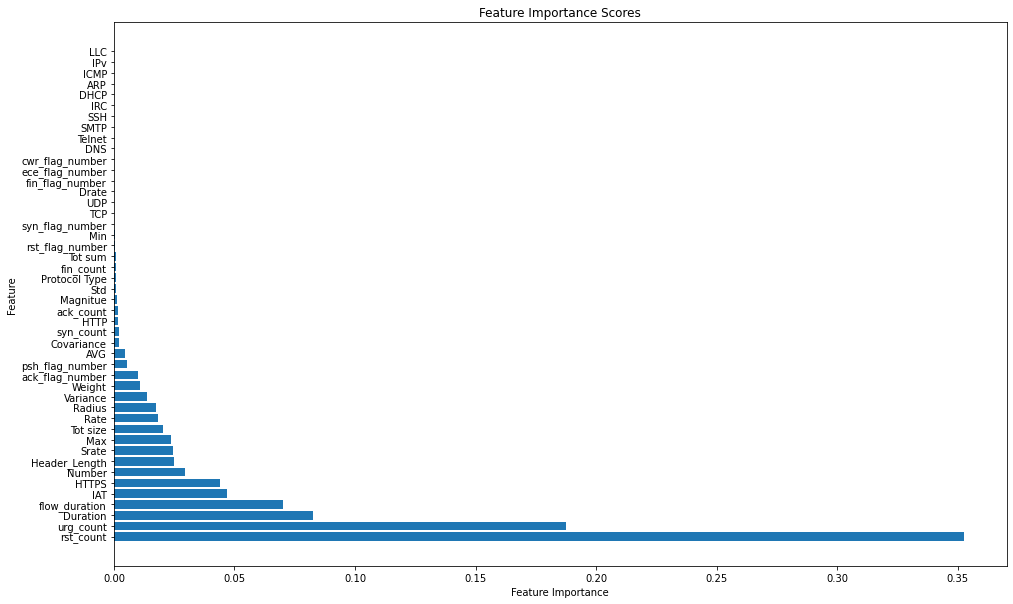

Execution time: 1.1059744358062744 seconds


In [23]:
# Start time
start_time = time.time()

# Zip feature names and importances, and sort based on importance scores in descending order
sorted_features = sorted(zip(feature_columns, importances), key=lambda x: x[1], reverse=True)
sorted_feature_names, sorted_importances = zip(*sorted_features)

# Check if data is empty
if not sorted_feature_names:
    print("No data to plot.")
else:
    # Plot sorted feature importance
    plt.figure(figsize=(16, 10))
    plt.barh(sorted_feature_names, sorted_importances)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.title("Feature Importance Scores")
    plt.show()
    
print_execution_time(start_time)

In [24]:


# Start time
start_time = time.time()

# Get feature importance scores
importances = model.stages[-1].featureImportances.toArray()

# Extract feature names
feature_names = feature_columns

# Create a DataFrame to store feature names and importance scores
schema = StructType([
    StructField("Feature", StringType(), True),
    StructField("Importance", FloatType(), True)
])

importance_data = [(name, float(importance)) for name, importance in zip(feature_names, importances)]
importance_df = spark.createDataFrame(importance_data, schema)

# Round importance scores to three decimals
importance_df = importance_df.withColumn("Importance", format_number(col("Importance"), 3))

# Order the DataFrame by importance scores in descending order
importance_df_sorted = importance_df.orderBy(col("Importance").desc())

# Show the sorted DataFrame with all rows
importance_df_sorted.show(importance_df_sorted.count(), truncate=False)

print_execution_time(start_time)

+---------------+----------+
|Feature        |Importance|
+---------------+----------+
|rst_count      |0.353     |
|urg_count      |0.187     |
|Duration       |0.083     |
|flow_duration  |0.070     |
|IAT            |0.047     |
|HTTPS          |0.044     |
|Number         |0.029     |
|Header_Length  |0.025     |
|Srate          |0.025     |
|Max            |0.024     |
|Tot size       |0.020     |
|Rate           |0.018     |
|Radius         |0.017     |
|Variance       |0.014     |
|Weight         |0.011     |
|ack_flag_number|0.010     |
|psh_flag_number|0.006     |
|AVG            |0.005     |
|ack_count      |0.002     |
|Covariance     |0.002     |
|syn_count      |0.002     |
|HTTP           |0.002     |
|Protocol Type  |0.001     |
|fin_count      |0.001     |
|Tot sum        |0.001     |
|Std            |0.001     |
|Magnitue       |0.001     |
|ece_flag_number|0.000     |
|Telnet         |0.000     |
|cwr_flag_number|0.000     |
|Min            |0.000     |
|DNS          

# Neural Network

In [25]:


# Start time
start_time = time.time()

# Filter features based on importance scores
selected_features = [feature_name for feature_name, importance in zip(feature_names, importances) if importance > 0.005]

# Initialize the VectorAssembler with selected features
assembler = VectorAssembler(inputCols=selected_features, outputCol='feat')

# Transform the DataFrames to replace the existing 'features' column with selected features
train_data = assembler.transform(train_data)
test_data = assembler.transform(test_data)

# Define the input size based on the number of selected features
input_size = len(selected_features)

# Define the layers for the neural network
output_size = 2  # Binary classification
layers = [input_size, 64, 32, output_size]  # Example: 3 hidden layers with 64, 32, and output_size neurons respectively

# Create the MultilayerPerceptronClassifier
mlp = MultilayerPerceptronClassifier(layers=layers, seed=1234, labelCol='label', featuresCol='feat')

# Fit the model using the training data
mlp_model = mlp.fit(train_data)

print_execution_time(start_time)


24/04/01 18:34:11 WARN MemoryStore: Not enough space to cache rdd_1068_13 in memory! (computed 41.0 MiB so far)
24/04/01 18:34:11 WARN BlockManager: Persisting block rdd_1068_13 to disk instead.
24/04/01 18:34:23 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
24/04/01 18:34:59 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
24/04/01 18:35:38 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
24/04/01 18:36:15 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
24/04/01 18:36:50 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
24/04/01 18:37:27 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
24/04/01 18:38:04 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
24/04/01 18:38:41 WARN Memor

24/04/01 19:15:04 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
24/04/01 19:15:42 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
24/04/01 19:16:16 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
24/04/01 19:16:49 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
24/04/01 19:17:22 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
24/04/01 19:17:54 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
24/04/01 19:18:26 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
24/04/01 19:19:00 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
24/04/01 19:19:32 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
2

24/04/01 19:56:27 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
24/04/01 19:57:00 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
24/04/01 19:57:34 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
24/04/01 19:58:09 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
24/04/01 19:58:42 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
24/04/01 19:59:15 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
24/04/01 19:59:48 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
24/04/01 20:00:21 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
24/04/01 20:00:53 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
2

24/04/01 20:38:19 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
24/04/01 20:38:53 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
24/04/01 20:39:28 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
24/04/01 20:40:02 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
24/04/01 20:40:38 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
24/04/01 20:41:10 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
24/04/01 20:41:43 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
24/04/01 20:42:14 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
24/04/01 20:42:48 WARN MemoryStore: Not enough space to cache rdd_1068_5 in memory! (computed 11.7 MiB so far)
2

Execution time: 8154.434247493744 seconds


In [26]:


# Start time
start_time = time.time()

# Make predictions on the test data
predictions = mlp_model.transform(test_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Accuracy:", accuracy)

print_execution_time(start_time)

Test Accuracy: 0.9804018038022974
Execution time: 48.07598853111267 seconds


In [27]:
# Print total execution time in seconds
print("Total execution time for all commands:", total_execution_time, "seconds")

# Convert total execution time to hours, minutes, and seconds
total_seconds = int(total_execution_time)
hours = total_seconds // 3600
minutes = (total_seconds % 3600) // 60
seconds = total_seconds % 60

# Print total execution time in hours:minutes:seconds format
print("Total execution time (hours:minutes:seconds):", f"{hours}:{minutes}:{seconds}")

Total execution time for all commands: 9598.652990579605 seconds
Total execution time (hours:minutes:seconds): 2:39:58
